### Logistics Regression

Step 1: import python Libraries
-   အခုတစ်ခါမှာတော့ ကျွန်တော်တို့က Regression (ကိန်းဂဏန်းခန့်မှန်းခြင်း) ကနေ Classification (အမျိုးအစားခွဲခြားခြင်း) ဘက်ကို ကူးပြောင်းလေ့လာတော့မှာ ဖြစ်ပါတယ်။ ဒီနေရာမှာ အဓိကသုံးမယ့် Algorithm ကတော့ Logistic Regression ဖြစ်ပါတယ်။

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # Data ကို သင်ယူရန်နှင့် စစ်ဆေးရန် ခွဲထုတ်ဖို့
from sklearn.preprocessing import StandardScaler      # Data များကို Scale ညှိရန် (ဥပမာ- -3 နှင့် 3 ကြား)
from sklearn.linear_model import LogisticRegression   # Classification အတွက် အဓိက Model
from sklearn.metrics import accuracy_score            # Model ဘယ်လောက်မှန်သလဲ တိုင်းတာဖို့
from matplotlib.colors import ListedColormap         # ရလဒ်များကို အရောင်ခွဲခြား ပြသဖို့

Step 2: (Importing the Dataset)
-   အခု ကျွန်တော်တို့ အသုံးပြုမယ့် Dataset ကတော့ Social Network Ads ဖြစ်ပါတယ်။ ဒါက လူတစ်ယောက်ရဲ့ အသက် (Age) နဲ့ ခန့်မှန်းလစာ (Estimated Salary) ပေါ်မူတည်ပြီး သူဟာ ကြော်ငြာထားတဲ့ ပစ္စည်း (ဥပမာ- ကား) ကို ဝယ်ယူခြင်း ရှိ/မရှိ (Purchased: 0 သို့မဟုတ် 1) ကို ခွဲခြားပေးမယ့် Classification ပုစ္ဆာ ဖြစ်ပါတယ်။

In [11]:
# IMPORTING THE DATASET
social_N_data = pd.read_csv(r'C:\Users\MSI\Desktop\Git_Project\AI_2026\Day06 Liner and logistic Regression, Perceptron, train and test\example\Social_Network_Ads.csv')

display(social_N_data.head())

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


####   # --- Method 1: Sigmoid Curve (Age တစ်ခုတည်းကို သုံးမယ်) ---

Step 3: Features ခွဲထုတ်ခြင်းနှင့် Train-Test Split (Preparing for Sigmoid)
-   Classification လုပ်တဲ့အခါမှာ Logistic Regression ရဲ့ သဘောတရားကို အလွယ်ကူဆုံးမြင်နိုင်ဖို့အတွက် ပထမဆုံးအနေနဲ့ "အသက် (Age)" တစ်ခုတည်းကိုပဲ Feature အဖြစ် သုံးပြီး စမ်းသပ်ကြည့်မှာ ဖြစ်ပါတယ်။

In [20]:
# ခန့်မှန်းလိုသည့် အဖြေ (Target) ကို y အဖြစ် သတ်မှတ်ခြင်း
y = social_N_data['Purchased'].values

# --- Method 1: Age တစ်ခုတည်းကို သုံးပြီး Sigmoid Curve ထွက်လာပုံကို လေ့လာခြင်း ---
X1 = social_N_data[['Age']].values

# Data ကို သင်ကြားရန် (Train) နှင့် စမ်းသပ်ရန် (Test) ဟူ၍ အချိုးကျ ခွဲထုတ်ခြင်း
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.25, random_state=0)

Step 4: Logistic Regression Model ကို training ‌ပေးခြင်း
-   ယခုအဆင့်မှာတော့ Features ထဲက "အသက် (Age)" တစ်ခုတည်းကို အသုံးပြုပြီး Logistic Regression Model ကို စတင် train လိုက်ပြီ ဖြစ်ပါတယ်။ ဒီ Model ကနေတစ်ဆင့် အသက်အရွယ်အလိုက် ဝယ်ယူနိုင်ခြေ (Probability) ကို တွက်ချက်ပေးမယ့် Sigmoid Function ပုံသေနည်းကို ရှာဖွေသွားမှာပါ။

In [13]:
model_1d = LogisticRegression()

model_1d.fit(X1_train, y1_train)

LogisticRegression()

Step 5: Model ၏ တိကျမှုကို စစ်ဆေးခြင်း (Accuracy Assessment)
-   ယခုအဆင့်တွင် Model မမြင်ဖူးသေးသော ဒေတာအသစ်များ (X1_test) ကို ပေး၍ ခန့်မှန်းခိုင်းပြီး၊ တကယ့်အဖြေမှန် (y1_test) နှင့် တိုက်စစ်ကာ တိကျမှု (Accuracy) မည်မျှရှိသည်ကို တိုင်းတာခြင်းဖြစ်ပါသည်။

In [21]:
# Model မမြင်ဖူးသေးသော Test Data များအပေါ် မူတည်၍ ခန့်မှန်းခြင်း
y1_pred = model_1d.predict(X1_test)

# ခန့်မှန်းချက်များနှင့် အဖြေမှန်များကို နှိုင်းယှဉ်၍ Accuracy တွက်ခြင်း
acc_1d = accuracy_score(y1_test, y1_pred)

print(f"Accuracy with Age only: {acc_1d :.2f}")

Accuracy with Age only: 0.90


Step 6: Sigmoid Curve ကို ပုံဖော်ခြင်း (Visualizing the Probability)
-   Logistic Regression ရဲ့ ထူးခြားချက်ကတော့ Linear Regression လို မျဉ်းဖြောင့်ကြီး မဟုတ်ဘဲ "S" ပုံသဏ္ဍာန် Sigmoid Curve ထွက်လာတာ ဖြစ်ပါတယ်။ ဒီ Curve က အသက် (Age) အလိုက် ဝယ်ယူနိုင်ခြေ (Probability) ဘယ်လောက်ရှိလဲဆိုတာကို ၀ နဲ့ ၁ ကြားမှာ ပြသပေးပါတယ်။

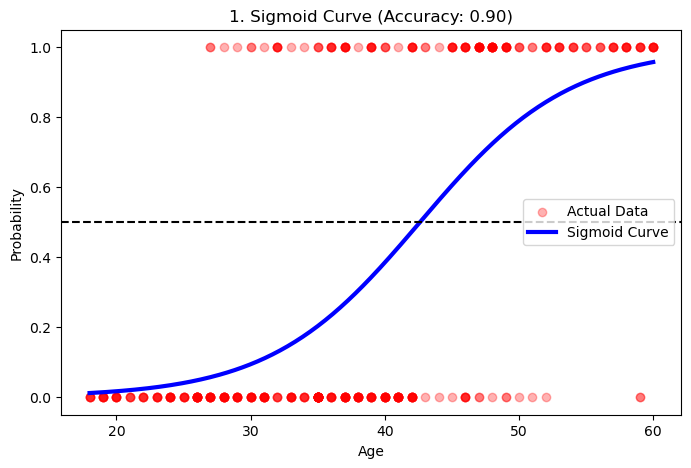

In [15]:
# Sigmoid Curve Plot
plt.figure(figsize=(8, 5))

# အသက်အနည်းဆုံးမှ အများဆုံးအထိ အမှတ် ၃၀၀ ကို ဖန်တီးခြင်း 
X_range = np.linspace(X1.min(), X1.max(), 300).reshape(-1, 1)

# predict_proba ကို သုံးပြီး ဝယ်ယူနိုင်ခြေ (Class 1 ဖြစ်နိုင်ခြေ) ကို တွက်ချက်ခြင်း
probs = model_1d.predict_proba(X_range)[:, 1]

# မူလဒေတာများကို အစက်ချခြင်း (၀ နှင့် ၁ နေရာများတွင်သာ ရှိမည်)
plt.scatter(X1, y, color='red', alpha=0.3, label='Actual Data')

# Sigmoid Curve ဆွဲခြင်း
plt.plot(X_range, probs, color='blue', linewidth=3, label='Sigmoid Curve')

# Threshold line (0.5) ကို ဆွဲခြင်း - ဤမျဉ်းအထက်ရောက်လျှင် ဝယ်မည်ဟု Model က ဆုံးဖြတ်သည်
plt.axhline(y=0.5, color='black', linestyle='--')

plt.title(f'1. Sigmoid Curve (Accuracy: {acc_1d:.2f})')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.legend()
plt.show()

####   # --- Method 2: Decision Boundary (Age နဲ့ Salary နှစ်ခုလုံးကို သုံးမယ်) ---

Step 7: Multiple Features အသုံးပြုခြင်း (Age + Salary)
-   ယခုတစ်ခါမှာတော့ ပိုမိုတိကျတဲ့ ခန့်မှန်းချက်ရရှိဖို့အတွက် "အသက် (Age)" အပြင် "ခန့်မှန်းလစာ (Estimated Salary)" ကိုပါ Feature အဖြစ် ထည့်သွင်းမှာ ဖြစ်ပါတယ်။ Feature နှစ်ခုဖြစ်သွားတဲ့အတွက် Model ဟာ graph ပေါ်မှာ မျဉ်းကွေး (Curve) တစ်ခုတည်းမဟုတ်ဘဲ နယ်နိမိတ် (Boundary) တစ်ခုကို တည်ဆောက်သွားမှာပါ။

In [ ]:
# Feature နှစ်ခုကို X2 အဖြစ် သတ်မှတ်ခြင်း
X2 = social_N_data[['Age', 'EstimatedSalary']].values

# Data ကို Training (၇၅%) နှင့် Test (၂၅%) ခွဲထုတ်ခြင်း
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.25, random_state=0)

Step 8: Feature Scaling နှင့် Model Training (2D)
-   ယခုအဆင့်သည် Logistic Regression တွင် အလွန်အရေးကြီးသော အပိုင်းဖြစ်ပါတယ်။ Age (၂၀-၆၀) နှင့် Salary (၂၀,၀၀၀-၁၅၀,၀၀၀) တို့သည် ကိန်းဂဏန်းတန်ဖိုး ကွာဟချက် အလွန်ကြီးမားသည့်အတွက် Model က လစာကို ပိုအရေးကြီးသည်ဟု မှားယွင်းယူဆခြင်းမရှိစေရန် Scaling လုပ်ပေးရခြင်း ဖြစ်ပါတယ်။

In [17]:
# Feature Scaling (Decision Boundary အတွက် အရေးကြီးပါတယ်)
sc = StandardScaler()

# Training Data ကို သုံးပြီး Scale ညှိရန် (Mean 0 နှင့် Standard Deviation 1 ဖြစ်အောင် ညှိခြင်း)
X2_train_scaled = sc.fit_transform(X2_train)

# Test Data ကိုလည်း Training Data ၏ Scale အတိုင်း ပြောင်းလဲခြင်း
X2_test_scaled = sc.transform(X2_test)

# Model အသစ် (model_2d) တည်ဆောက်ပြီး Scaled Data များဖြင့် သင်ကြားပေးခြင်း
model_2d = LogisticRegression()
model_2d.fit(X2_train_scaled, y2_train)

LogisticRegression()

Step 9: Accuracy ကို ပြန်လည်စစ်ဆေးခြင်း (Comparing the Results)
-   ယခု Features (၂) ခုစလုံးကို အသုံးပြုထားသော Model ၏ တိကျမှုကို တိုင်းတာကြည့်သည့်အခါ အသက် (Age) တစ်ခုတည်း သုံးခဲ့စဉ်ကထက် တိကျမှု သိသိသာသာ ပြောင်းလဲသွားသည်ကို တွေ့ရမည်ဖြစ်ပါသည်။

In [22]:
# ၁။ Scaled လုပ်ထားသော Test Data ကို သုံးပြီး ခန့်မှန်းခြင်း
y2_pred = model_2d.predict(X2_test_scaled)

# ၂။ Accuracy ကို တွက်ချက်ခြင်း
acc_2d = accuracy_score(y2_test, y2_pred)

print(f"Accuracy with Age & Salary: {acc_2d :.2f}")

Accuracy with Age & Salary: 0.89


Step 10: Decision Boundary ကို ပုံဖော်ခြင်း (Visualizing the Decision Regions)
-   ဒါကတော့ Logistic Regression ရဲ့ နောက်ဆုံးနဲ့ အကောင်းဆုံးအပိုင်းပါ။ အသက် (Age) နဲ့ လစာ (Salary) ပေါင်းစပ်လိုက်တဲ့အခါ Model က ဘယ်လိုစည်းခြားပြီး အမျိုးအစားခွဲခြားသလဲဆိုတာကို ကွက်ကွက်ကွင်းကွင်း မြင်ရမှာ ဖြစ်ပါတယ်။

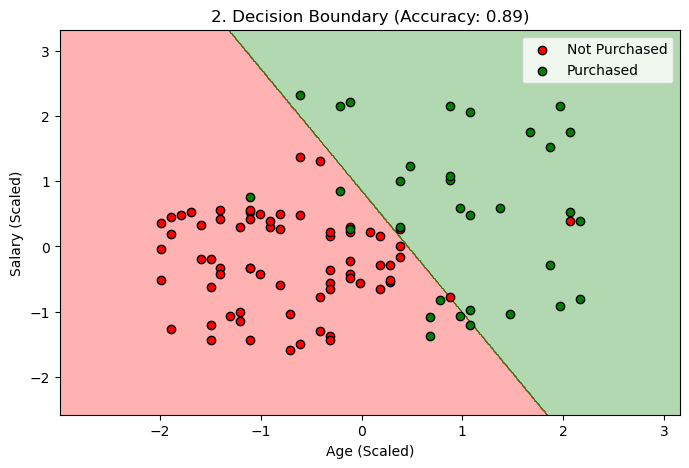

In [27]:
# Decision Boundary Plot
plt.figure(figsize=(8, 5))
X_set, y_set = X2_test_scaled, y2_test

# ပုံဆွဲရန် Grid နယ်နိမိတ် သတ်မှတ်ခြင်း
x_min, x_max = X_set[:, 0].min() - 1, X_set[:, 0].max() + 1
y_min, y_max = X_set[:, 1].min() - 1, X_set[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Grid တစ်ခုလုံးရှိ အမှတ်များအတွက် Class ခန့်မှန်းခြင်း
Z = model_2d.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# ခန့်မှန်းထားသော နယ်မြေများကို အရောင်ခြယ်ခြင်း (အနီ = မဝယ်၊ အစိမ်း = ဝယ်)
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('red', 'green')))

# တကယ့် Test Data အစက်လေးများကို ထပ်တင်ခြင်း
plt.scatter(X_set[y_set==0, 0], X_set[y_set==0, 1], c='red', label='Not Purchased', edgecolors='k')
plt.scatter(X_set[y_set==1, 0], X_set[y_set==1, 1], c='green', label='Purchased', edgecolors='k')

plt.title(f'2. Decision Boundary (Accuracy: {acc_2d:.2f})')
plt.xlabel('Age (Scaled)')
plt.ylabel('Salary (Scaled)')
plt.legend()
plt.show()